# **Loan Prediction Based on Customer Behavior**

By Furkan Mistry

Roll no - 24

UID - 2309032

An organization wants to predict who possible defaulters are for the consumer loans product. They have data about historic customer behavior based on what they have observed. Hence when they acquire new customers they want to predict who is riskier and who is not.

https://www.kaggle.com/datasets/subhamjain/loan-prediction-based-on-customer-behavior

About Data
*   ID: Id of the user(All Unique)
*   Income: Income of the user
*   Age: Age of the user
* Experience: Professional experience of the user in years
* Profession: Profession of the user
* Married/Single: Whether married or not
* House_Ownership: Owned or rented or neither
* Car_Ownership: Does the person own a car
* STATE: State of residence
* CITY: City of residence
* CURRENT_JOB_YRS: Years of experience in the current job
* CURRENT_HOUSE_YRS: Number of years in the current residence\
* Risk_Flag: Defaulted on a loan(Target variable)




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In this Colab notebook, we'll be working with two CSV files: train.csv and test csv, containing our training and testing data, respectively. Our goal is to combine these datasets into a single dataframe, perform various transformations, preprocessing steps, and encoding, and then split the combined dataset into training and testing sets.

In [ ]:
import pandas as pd

train_df = pd.read_csv("/content/drive/MyDrive/ML/Training Data.csv")
train_df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [ ]:
train_df.shape

(252000, 13)

In [ ]:
train_df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [ ]:
test_df = pd.read_csv("/content/drive/MyDrive/ML/Test Data.csv")

In [ ]:
test_df.shape

(28000, 13)

In [ ]:
test_df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [ ]:
df = pd.concat([train_df, test_df], axis=0)

In [ ]:
df.reset_index(drop=True, inplace=True)

# Add 1 to the 'SrNo' column to shift the IDs to start from 1
df['Id'] = df.index + 1

In [ ]:
df.tail()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
279995,279996,9955481,57,13,single,rented,no,Statistician,Eluru[25],Andhra Pradesh,5,10,0
279996,279997,2917765,47,9,single,rented,no,Technical writer,Ratlam,Madhya Pradesh,9,14,1
279997,279998,8082415,24,5,single,rented,no,Lawyer,Mira-Bhayandar,Maharashtra,4,13,0
279998,279999,9474180,51,13,single,rented,yes,Chartered Accountant,Bhilai,Chhattisgarh,13,14,0
279999,280000,9250350,42,9,single,rented,no,Chef,Navi Mumbai,Maharashtra,4,10,0


In [ ]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,280000.000000,2.800000e+05,280000.000000,280000.000000,280000.000000,280000.000000,280000.000000
mean,140000.500000,5.000361e+06,49.964132,10.088032,6.334418,11.997193,0.123532
std,80829.182024,2.876988e+06,17.070465,6.005066,3.646864,1.398907,0.329048
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,70000.750000,2.506726e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,140000.500000,5.003310e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,210000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,280000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [ ]:
df


,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
279995,279996,9955481,57,13,single,rented,no,Statistician,Eluru[25],Andhra Pradesh,5,10,0
279996,279997,2917765,47,9,single,rented,no,Technical writer,Ratlam,Madhya Pradesh,9,14,1
279997,279998,8082415,24,5,single,rented,no,Lawyer,Mira-Bhayandar,Maharashtra,4,13,0
279998,279999,9474180,51,13,single,rented,yes,Chartered Accountant,Bhilai,Chhattisgarh,13,14,0


Total rows after combining train and test data = 280000

# **Data Visualization**

In [ ]:
!pip install seaborn

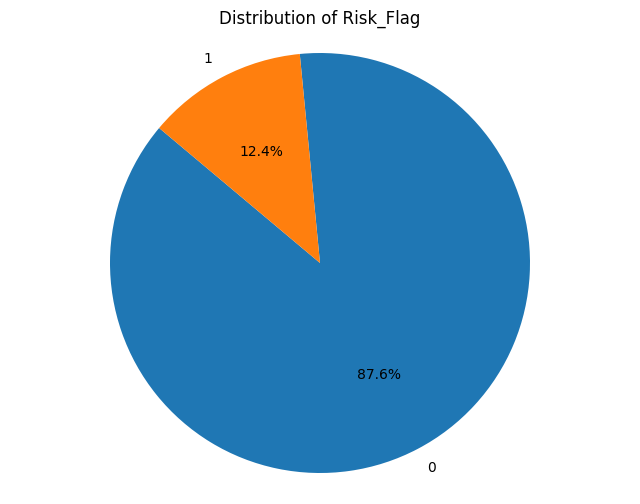

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

risk_counts = df['Risk_Flag'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(risk_counts, labels=risk_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Risk_Flag')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


Distribution of Age

<ipython-input-17-9cf1bd54d922>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df["Age"])


<Axes: xlabel='Age', ylabel='Density'>

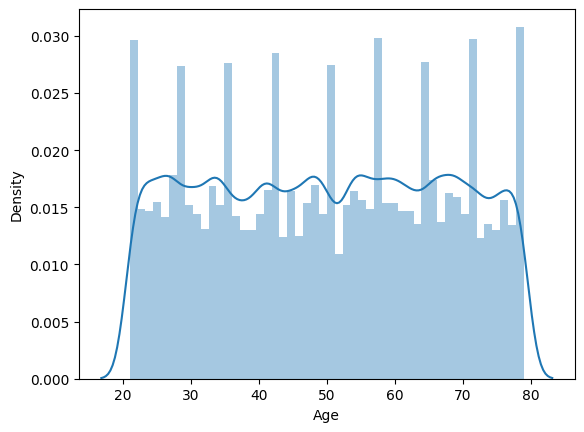

In [ ]:
import seaborn as sns

sns.distplot(a=df["Age"])

Distribution of Income

<ipython-input-18-15dfd5b51049>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df["Income"]);


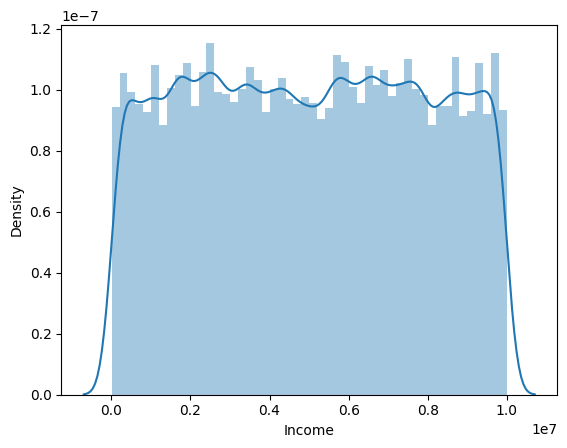

In [ ]:
sns.distplot(a=df["Income"]);

I tried different transformations in order to convert the column data into a symmetric curve, aiming to enhance its symmetry, as it supposedly improves the performance of machine learning algorithms. However, despite my efforts, the data continued to exhibit asymmetry, as confirmed by the QQ plot. It's worth noting that I conducted these transformations in a rough notebook, but I chose not to include them in this project as they didn't contribute meaningfully to its objectives.

Effect of House ownership on Risk Flag

<Axes: xlabel='House_Ownership', ylabel='count'>

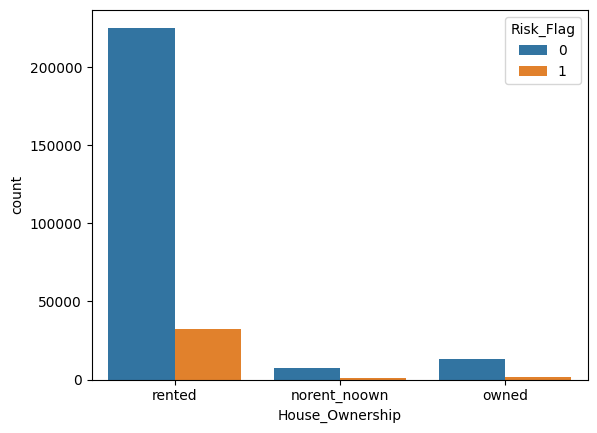

In [ ]:
sns.countplot(x='House_Ownership', hue='Risk_Flag', data=df)

Effect of Car owners on Risk Flag

<Axes: xlabel='Car_Ownership', ylabel='count'>

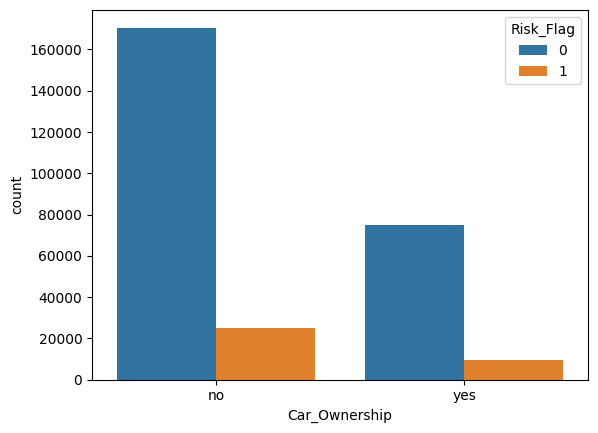

In [ ]:
sns.countplot(x='Car_Ownership', hue='Risk_Flag', data=df)

Effect of Marital Status on Risk Flag

<Axes: xlabel='Married/Single', ylabel='count'>

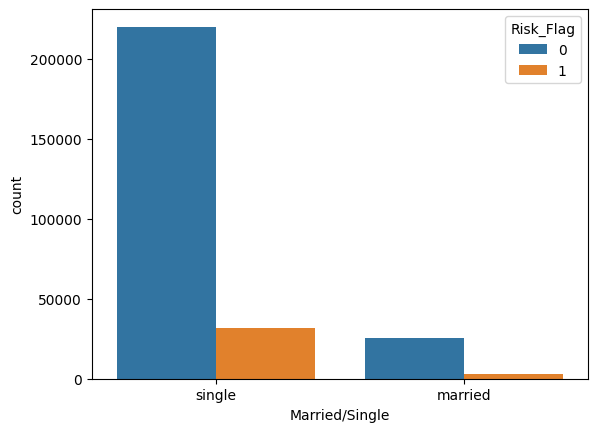

In [ ]:
sns.countplot(x='Married/Single', hue='Risk_Flag', data=df)


Correlation

<ipython-input-22-2af366b0e523>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True);


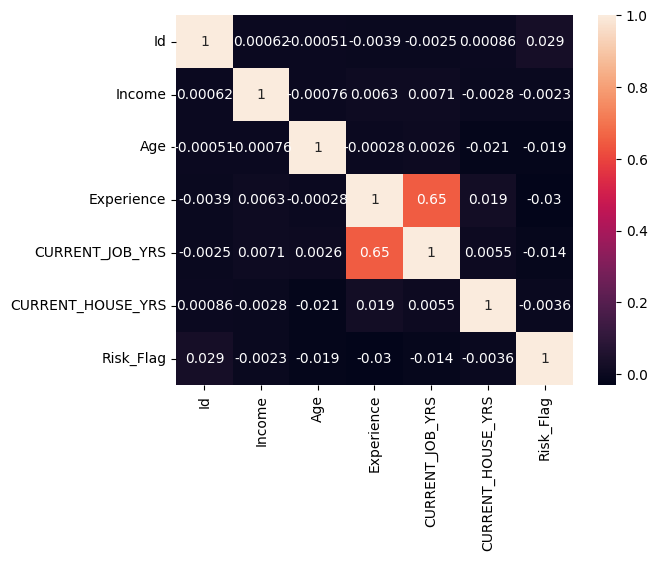

In [ ]:
sns.heatmap(df.corr(), annot=True);

## **Preprocessing**

Looks like there are some erroneous values in our City column which follow a similar trend.

Eg:- Eluru[25]

In [ ]:
for i in range(len(df.CITY)):
    for j in df.CITY[i]:
        if j == '[':
            df.at[i,'CITY'] = df.CITY[i].split('[')[0]

**Check for null values**

In [ ]:
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

**Outlier Analysis**

Text(0, 0.5, 'Age')

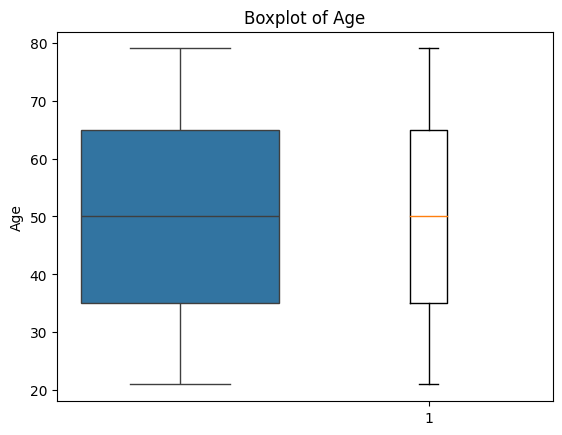

In [ ]:
# NO OUTLIERS FOUND FOR AGE
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(y = 'Age', data = df)

plt.boxplot(df['Age'])
plt.title('Boxplot of Age')
plt.ylabel('Age')

Text(0, 0.5, 'Income')

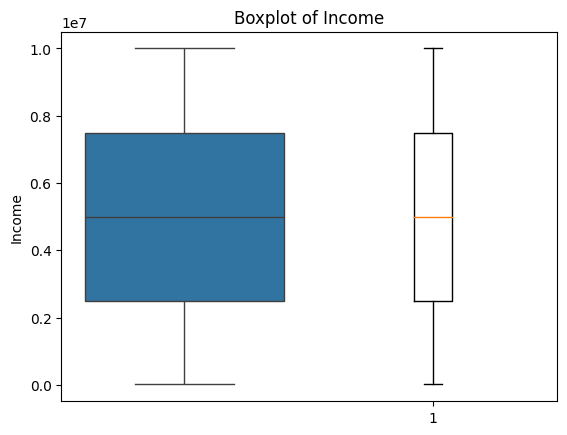

In [ ]:
### NO OUTLIERS FOUND FOR INCOME
import seaborn as sns
sns.boxplot(y = 'Income', data = df)

plt.boxplot(df['Income'])

plt.title('Boxplot of Income')
plt.ylabel('Income')

Text(0, 0.5, 'CURRENT_JOB_YRS')

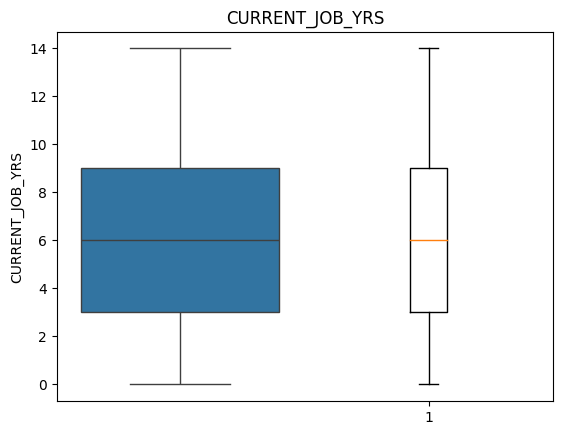

In [ ]:
### NO OUTLIERS FOUND FOR CURRENT_JOB_YRS
import seaborn as sns
sns.boxplot(y = 'CURRENT_JOB_YRS', data = df)

plt.boxplot(df['CURRENT_JOB_YRS'])

plt.title('CURRENT_JOB_YRS')
plt.ylabel('CURRENT_JOB_YRS')

Text(0, 0.5, 'CURRENT_HOUSE_YRS')

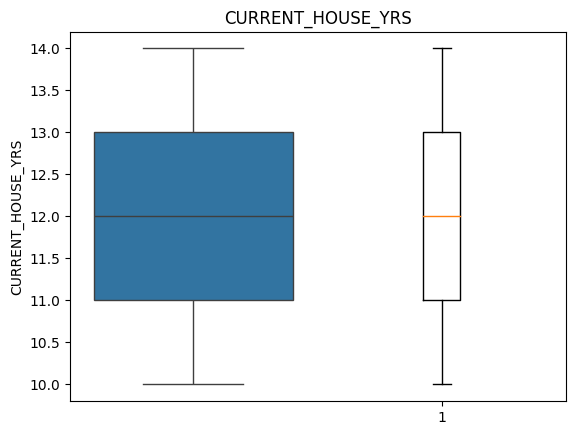

In [ ]:
### NO OUTLIERS FOUND FOR CURRENT_HOUSE_YRS
import seaborn as sns
sns.boxplot(y = 'CURRENT_HOUSE_YRS', data = df)

plt.boxplot(df['CURRENT_HOUSE_YRS'])

plt.title('CURRENT_HOUSE_YRS')
plt.ylabel('CURRENT_HOUSE_YRS')

In [ ]:
df['Experience']

0          3
1         10
2          4
3          2
4         11
          ..
279995    13
279996     9
279997     5
279998    13
279999     9
Name: Experience, Length: 280000, dtype: int64

Text(0, 0.5, 'Experience')

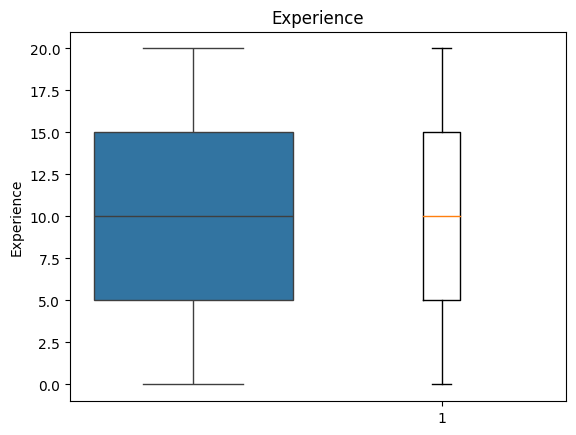

In [ ]:
### NO OUTLIERS FOUND FOR CURRENT_HOUSE_YRS
import seaborn as sns
sns.boxplot(y = 'Experience', data = df)

plt.boxplot(df['Experience'])

plt.title('Experience')
plt.ylabel('Experience')

# **Feature Engineering**

With just 11 features on hand, I figured it'd be beneficial to dive into some meaningful machine learning feature engineering. The idea was to craft new features that could offer deeper insights and improve the overall predictive capabilities of the model.

I condensed the 'Experience_group' and 'age_groups' columns into three distinct groups each, a move aimed at simplifying the data for subsequent one-hot encoding.

In [ ]:
import pandas as pd

# Define function to create experience groups
def experience_group(x):
    if x < 2:
        return 'Entry-level'
    elif 2 <= x < 5:
        return 'Intermediate'
    elif 5 <= x < 10:
        return 'Mid-level'
    else:
        return 'Senior or executive-level'

# Create Experience groups
df['Experience_group'] = df['Experience'].apply(experience_group)

# Define function to create age groups
def age_group(x):
    if x < 30:
        return 'Young'
    elif 30 <= x < 50:
        return 'Middle-aged'
    else:
        return 'Elderly'

# Create Age group
df['Age_group'] = df['Age'].apply(age_group)

# Display the updated dataframe
print(df.head())


   Id   Income  Age  Experience Married/Single House_Ownership Car_Ownership  \
0   1  1303834   23           3         single          rented            no   
1   2  7574516   40          10         single          rented            no   
2   3  3991815   66           4        married          rented            no   
3   4  6256451   41           2         single          rented           yes   
4   5  5768871   47          11         single          rented            no   

            Profession             CITY           STATE  CURRENT_JOB_YRS  \
0  Mechanical_engineer             Rewa  Madhya_Pradesh                3   
1   Software_Developer         Parbhani     Maharashtra                9   
2     Technical_writer        Alappuzha          Kerala                4   
3   Software_Developer      Bhubaneswar          Odisha                2   
4        Civil_servant  Tiruchirappalli      Tamil_Nadu                3   

   CURRENT_HOUSE_YRS  Risk_Flag           Experience_group    

## **Encoding**

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.2 MB/s eta 0:00:00


Binary Encoding

I opted for binary encoding for 'Marital_Status' and 'Car_Ownership' since both variables had only two possible values.

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelBinarizer

# Rename the column
df.rename(columns={"Married/Single": "Marital_Status"}, inplace=True)

le_ms=preprocessing.LabelBinarizer()
df["Marital_Status"]=le_ms.fit_transform(df["Marital_Status"])

le_ms=preprocessing.LabelBinarizer()
df["Car_Ownership"]=le_ms.fit_transform(df["Car_Ownership"])


Target Encoding

I chose target encoding for the 'Profession' feature due to its numerous unique values. Using one-hot encoding would have significantly increased computation time, making target encoding a more efficient alternative.

In [ ]:
import category_encoders as ce
target_encoder = ce.TargetEncoder()

# Fit target encoder on the entire dataset
df['Profession_encoded'] = target_encoder.fit_transform(df['Profession'], df['Risk_Flag'])


# Drop the original 'Profession' column
df.drop('Profession', axis=1, inplace=True)

LabelEncoding

I did label encoding for the 'STATE' and 'CITY' columns, aiming to convert them into numeric representations. This step was necessary as I intended to use the SMOTE technique, which mandates all columns to be numeric.

In [ ]:
from sklearn.preprocessing import LabelEncoder

features = ['CITY','STATE']
label_encoder = LabelEncoder()

for col in features:
    df[col] = label_encoder.fit_transform(df[col])



One Hot Encoding

Then I performed one-hot encoding for the 'House_Ownership' column, along with the newly engineered features 'Age_group' and 'Experience_group'. This decision was motivated by the fact that these features had classes within the range of 2 to 6, making one-hot encoding a suitable method for handling categorical data.

In [ ]:
# One hot encoding
df_encoded = pd.get_dummies(df['House_Ownership'], prefix='House_Ownership')

# Concatenating the encoded columns with the original DataFrame
df = pd.concat([df, df_encoded], axis=1)

# Dropping the original categorical column
df.drop('House_Ownership', axis=1, inplace=True)

In [ ]:
# Perform one-hot encoding for both Age_group and Experience_group
df = pd.get_dummies(df, columns=['Age_group', 'Experience_group'], drop_first=True)

# Drop Age and Experience columns
df.drop(['Age', 'Experience'], axis=1, inplace=True)

# Display the updated dataframe
print(df.head())

   Id   Income  Marital_Status  Car_Ownership  CITY  STATE  CURRENT_JOB_YRS  \
0   1  1303834               1              0   261     17                3   
1   2  7574516               1              0   235     18                9   
2   3  3991815               0              0     8     15                4   
3   4  6256451               1              1    54     21                2   
4   5  5768871               1              0   311     27                3   

   CURRENT_HOUSE_YRS  Risk_Flag  Profession_encoded  \
0                 13          0            0.111558   
1                 13          0            0.148427   
2                 10          0            0.134167   
3                 12          1            0.148427   
4                 14          1            0.115794   

   House_Ownership_norent_noown  House_Ownership_owned  \
0                             0                      0   
1                             0                      0   
2                   

# **Feature Scalling**

I did both MinMaxScaler and StandardScaler for the columns that were not encoded. Opting for MinMaxScaler was driven by its ability to reduce training time more effectively compared to other scaling techniques.

In [ ]:
# from sklearn.preprocessing import StandardScaler

# # Select the numerical features to scale
# numerical_features = ['Income', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']

# # Initialize the StandardScaler
# scaler = StandardScaler()

# # Fit the scaler on the numerical features in the original DataFrame and transform it
# df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Select the numerical features to scale
numerical_features = ['Income', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the numerical features in the original DataFrame and transform it
df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [ ]:
df

,Id,Income,Marital_Status,Car_Ownership,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Profession_encoded,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented,Age_group_Middle-aged,Age_group_Young,Experience_group_Intermediate,Experience_group_Mid-level,Experience_group_Senior or executive-level
0,1,0.129487,1,0,261,17,0.214286,0.75,0,0.111558,0,0,1,0,1,1,0,0
1,2,0.757206,1,0,235,18,0.642857,0.75,0,0.148427,0,0,1,1,0,0,0,1
2,3,0.398564,0,0,8,15,0.285714,0.00,0,0.134167,0,0,1,0,0,1,0,0
3,4,0.625263,1,1,54,21,0.142857,0.50,1,0.148427,0,0,1,1,0,1,0,0
4,5,0.576454,1,0,311,27,0.214286,1.00,1,0.115794,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279995,279996,0.995550,1,0,91,0,0.357143,0.00,0,0.118401,0,0,1,0,0,0,0,1
279996,279997,0.291047,1,0,258,16,0.642857,1.00,1,0.136364,0,0,1,1,0,0,1,0
279997,279998,0.808049,1,0,194,18,0.285714,0.75,0,0.129880,0,0,1,0,1,0,1,0
279998,279999,0.947370,1,1,47,5,0.928571,1.00,0,0.130682,0,0,1,0,0,0,0,1


# **Model Building**

Since the dataset exhibits imbalance, I applied the SMOTE technique to address this issue. SMOTE involves introducing synthetic instances to balance out the distribution of the target variable.

In [ ]:
# Define your feature matrix X and target variable y
X = df.drop('Risk_Flag', axis=1)
y = df['Risk_Flag']

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Apply SMOTE to the training data only
smote = SMOTE(random_state=52)
X_resampled, y_resampled = smote.fit_resample(X, y)

Train, test split (80:20)

In [ ]:
from sklearn.model_selection import train_test_split


X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=52)

## Here are some key terminologies to be familiar with before diving into model building

##  Confusion Matrix:
    
  A confusion matrix is a table that summarizes the performance of a classification model.
  
  It presents the counts of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN).

## True Positive (TP):
  The number of correctly predicted positive instances by the model.

## True Negative (TN):
  The number of correctly predicted negative instances by the model.

## False Positive (FP):
  The number of negative instances incorrectly classified as positive by the model (Type I error).

## False Negative (FN):
  The number of positive instances incorrectly classified as negative by the model (Type II error).

## Precision (also called Positive Predictive Value):
  Precision is the ratio of true positive predictions to the total number of positive predictions made by the model.
  
  Formula: Precision = TP / (TP + FP)

## Recall (also called Sensitivity or True Positive Rate):
  Recall is the ratio of true positive predictions to the total number of actual positive instances in the data.
  
  Formula: Recall = TP / (TP + FN)

## Specificity (also called True Negative Rate):
  Specificity measures the proportion of actual negative instances that are correctly identified by the model.
  
  Formula: Specificity = TN / (TN + FP)

## F1 Score:
  F1 score is the harmonic mean of precision and recall, providing a balance between the two metrics.
  
  Formula: F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

## Accuracy:

  Accuracy measures the overall correctness of the model, i.e., the ratio of correct predictions to the total number of predictions.
  
  Formula: Accuracy = (TP + TN) / (TP + TN + FP + FN)

# **1) Extra tree**

I chose Extra Trees because it adds even more randomness compared to Random Forests. In Random Forests, each decision tree considers only a random subset of features when deciding how to split at each node. But with Extra Trees, it goes a step further. Not only does it pick random subsets of features, but it also randomly selects thresholds for each feature's split points instead of choosing the best possible one.

This extra randomness helps make the model more flexible and less prone to memorizing the training data, which can lead to overfitting. By encouraging the trees to be more diverse and less similar to each other, Extra Trees aims to improve the model's ability to make accurate predictions on new, unseen data.

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score

# Initialize Extra Trees classifier
extra_trees_classifier = ExtraTreesClassifier()

# Train the classifier
extra_trees_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = extra_trees_classifier.predict(X_test_resampled)

# Calculate accuracy
extra_tree_accuracy = accuracy_score(y_test_resampled, y_pred)

# Print accuracy
print("Accuracy:", extra_tree_accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test_resampled, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_resampled, y_pred))

# Calculate precision
precision = precision_score(y_test_resampled, y_pred)

# Calculate recall
recall = recall_score(y_test_resampled, y_pred)

# Print precision and recall
print("\nPrecision:", precision)
print("Recall:", recall)


Accuracy: 0.9321244842866602

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93     48914
           1       0.94      0.92      0.93     49251

    accuracy                           0.93     98165
   macro avg       0.93      0.93      0.93     98165
weighted avg       0.93      0.93      0.93     98165


Confusion Matrix:
[[46260  2654]
 [ 4009 45242]]

Precision: 0.9445882745949558
Recall: 0.9186006375505066


# **2) K Nearest Neighbour (KNN)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

knn_classifier = KNeighborsClassifier()

knn_classifier.fit(X_train_resampled, y_train_resampled)

y_pred_resampled = knn_classifier.predict(X_test_resampled)

knn_accuracy = accuracy_score(y_test_resampled, y_pred_resampled)

print("Accuracy:", knn_accuracy)

print("\nClassification Report:")
print(classification_report(y_test_resampled, y_pred_resampled))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_resampled, y_pred_resampled))


Accuracy: 0.777334080374879

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.65      0.75     48914
           1       0.72      0.90      0.80     49251

    accuracy                           0.78     98165
   macro avg       0.80      0.78      0.77     98165
weighted avg       0.80      0.78      0.77     98165


Confusion Matrix:
[[31949 16965]
 [ 4893 44358]]


# **3) Random forest**



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_classifier = RandomForestClassifier(random_state=32)

rf_classifier.fit(X_train_resampled, y_train_resampled)

y_pred_resampled = rf_classifier.predict(X_test_resampled)

random_forest_accuracy = accuracy_score(y_test_resampled, y_pred_resampled)

print("Accuracy:", random_forest_accuracy)

print("\nClassification Report:")
print(classification_report(y_test_resampled, y_pred_resampled))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_resampled, y_pred_resampled))


Accuracy: 0.9359242092395457

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     48914
           1       0.95      0.92      0.93     49251

    accuracy                           0.94     98165
   macro avg       0.94      0.94      0.94     98165
weighted avg       0.94      0.94      0.94     98165


Confusion Matrix:
[[46729  2185]
 [ 4105 45146]]


# **4) Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

dt_classifier = DecisionTreeClassifier(random_state=32)

dt_classifier.fit(X_train_resampled, y_train_resampled)

y_pred_resampled = dt_classifier.predict(X_test_resampled)

decision_tree_accuracy = accuracy_score(y_test_resampled, y_pred_resampled)

print("Accuracy:", decision_tree_accuracy)

print("\nClassification Report:")
print(classification_report(y_test_resampled, y_pred_resampled))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_resampled, y_pred_resampled))


Accuracy: 0.9241786787551571

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     48914
           1       0.92      0.92      0.92     49251

    accuracy                           0.92     98165
   macro avg       0.92      0.92      0.92     98165
weighted avg       0.92      0.92      0.92     98165


Confusion Matrix:
[[45188  3726]
 [ 3717 45534]]


# **5) Bernoulli NB**

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

bernoulli_nb = BernoulliNB()

bernoulli_nb.fit(X_train_resampled, y_train_resampled)

y_pred = bernoulli_nb.predict(X_test_resampled)

bernoulli_accuracy = accuracy_score(y_test_resampled, y_pred)
print("Accuracy:", bernoulli_accuracy)

print("Confusion Matrix:")
print(confusion_matrix(y_test_resampled, y_pred))

print("\nClassification Report:")
print(classification_report(y_test_resampled, y_pred))


Accuracy: 0.7630418173483421
Confusion Matrix:
[[35574 13340]
 [ 9921 39330]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.73      0.75     48914
           1       0.75      0.80      0.77     49251

    accuracy                           0.76     98165
   macro avg       0.76      0.76      0.76     98165
weighted avg       0.76      0.76      0.76     98165



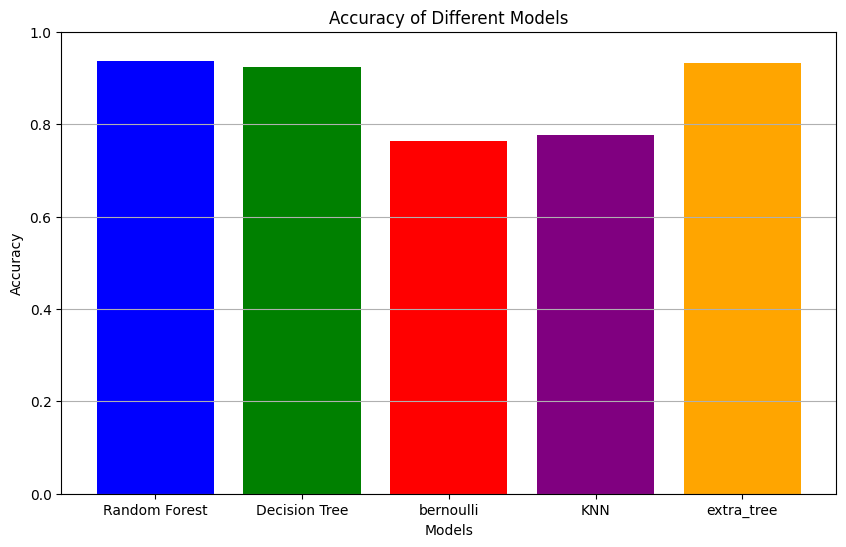

In [ ]:
import matplotlib.pyplot as plt

models = ['Random Forest', 'Decision Tree', 'bernoulli', 'KNN', 'extra_tree']
accuracies = [random_forest_accuracy, decision_tree_accuracy, bernoulli_accuracy, knn_accuracy, extra_tree_accuracy]

colors = ['blue', 'green', 'red', 'purple', 'orange']

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=colors)

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0, 1)  # Set y-axis limit to ensure all accuracies are visible
plt.grid(axis='y')  # Add gridlines along the y-axis

# Show the plot
plt.show()


# **As evident from the results, the Extra Trees model stands out as the top performer among the five models evaluated.**

As per my analysis the lower performance of Naive Bayes and KNN compared to tree-based models could be attributed to the fact that these models are sensitive to the relationships between features and the target variable. If the features are not strongly related or predictive of the target variable, Naive Bayes and KNN may struggle to accurately capture the underlying patterns. This could be due to violations of the independence assumption in Naive Bayes, the curse of dimensionality affecting KNN, or the complexity of the data distribution. Additionally, these models may benefit from feature engineering techniques to extract more informative features from the data.

# ROC curve for Extra Tree

AUC Score: 0.9735833807320442


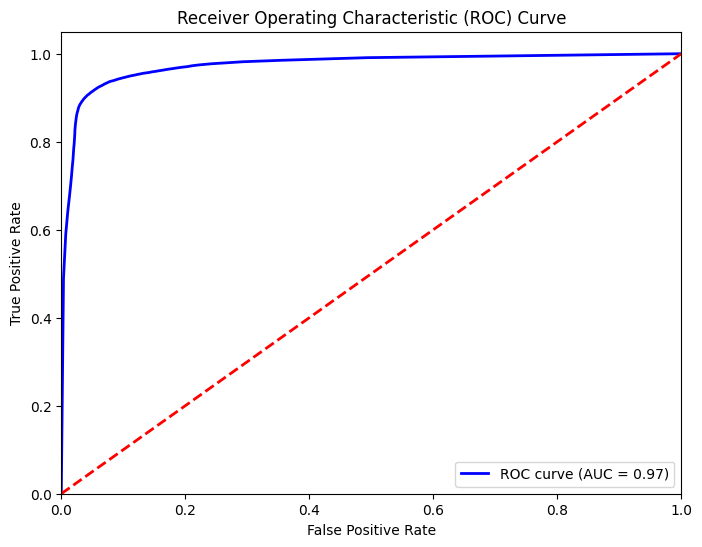

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate AUC score
auc_score = roc_auc_score(y_test_resampled, extra_trees_classifier.predict_proba(X_test_resampled)[:,1])
print("AUC Score:", auc_score)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_resampled, extra_trees_classifier.predict_proba(X_test_resampled)[:,1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


I used ROC score as well due to the dataset's imbalance. ROC evaluates classifier performance across thresholds, vital for imbalanced data. Traditional metrics can mislead in such cases. ROC/AUC offer nuanced evaluation by considering sensitivity and specificity across thresholds, ensuring robust classification in imbalanced datasets.

# **Hypertuning**

# **Hypertuning using Xgboost as it has GPU accelaration**


I opted for XGBoost over further enhancing Extra Trees because XGBoost offers 'gpu_hist', leveraging GPU acceleration. This was essential as my dataset expanded to 400,000 rows after SMOTE, necessitating GPU utilization for efficient computation.

I used L1 and L2 regularization parameters (reg_alpha and reg_lambda) in the parameter grid because I wanted to mitigate overfitting. L1 regularization (reg_alpha) adds a penalty equivalent to the absolute value of the magnitude of coefficients, promoting sparsity in feature selection. L2 regularization (reg_lambda) adds a penalty equivalent to the square of the magnitude of coefficients, encouraging smaller weights for features. By incorporating both regularization techniques, the model can effectively control overfitting and improve generalization performance on unseen data.

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import randint, uniform
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Define the hyperparameter grid
param_grid = {
    'learning_rate': uniform(0.01, 0.3),# Learning rate: controls how fast the model learns.
    'n_estimators': randint(50, 200), # Number of trees in the random forest.
    'max_depth': randint(1, 2), # Maximum depth of each tree.
    'min_child_weight': randint(1, 10), # Minimum number of samples required to split an internal node.
    'gamma': uniform(0, 0.2), # Regularization parameter to control overfitting.
    'subsample': uniform(0.6, 0.4), # Fraction of samples to use for training each tree.
    'colsample_bytree': uniform(0.6, 0.4), # Fraction of features to use for training each tree.
    'reg_alpha': uniform(0, 1),  # L1 regularization parameter
    'reg_lambda': uniform(0, 1)  # L2 regularization parameter
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=XGBClassifier(random_state=42, tree_method='gpu_hist'),
    param_distributions=param_grid,
    n_iter=20,
    scoring='accuracy',
    cv=4,  # 4-fold cross-validation
    verbose=2,
    n_jobs=-1  # Utilize all available CPU cores
)

# Perform random search to find the best hyperparameters
random_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters found
print("Best Parameters:", random_search.best_params_)

# Evaluate the best model
best_model = random_search.best_estimator_

y_pred_best = best_model.predict(X_test_resampled)

# Calculate accuracy on the testing data
accuracy_best = accuracy_score(y_test_resampled, y_pred_best)
print("Accuracy (Best Model):", accuracy_best)

# Calculate precision and recall on the testing data
precision_best = precision_score(y_test_resampled, y_pred_best)
recall_best = recall_score(y_test_resampled, y_pred_best)

print("Precision (Best Model):", precision_best)
print("Recall (Best Model):", recall_best)


Fitting 4 folds for each of 20 candidates, totalling 80 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:59:15] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Best Parameters: {'colsample_bytree': 0.8368594206626921, 'gamma': 0.04524270976111866, 'learning_rate': 0.23411864033263313, 'max_depth': 1, 'min_child_weight': 5, 'n_estimators': 165, 'reg_alpha': 0.5305900857973187, 'reg_lambda': 0.6792241062184781, 'subsample': 0.6411730994956326}
Accuracy (Best Model): 0.8778688942087302
Precision (Best Model): 0.9728440180701488
Recall (Best Model): 0.7782989177884713


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:59:15] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


In our case of identifying loan defaulters, both precision and recall held equal importance. Therefore, our approach aimed to improve both metrics while avoiding overfitting. This involved carefully selecting features, optimizing model parameters, and employing regularization techniques to achieve a balanced performance that minimized false positives and false negatives.

# **Conclusion**

Following hyperparameter tuning, the precision of the model notably improved, with a precision score of 0.9728. However, despite this enhancement, the accuracy and recall metrics slightly decreased compared to Extra Trees. Given the equal importance of accuracy, precision, and recall in our loan prediction task, we opt to prioritize the Extra Trees model over XGBoost post-hyperparameter tuning. This decision ensures a balanced consideration of all three metrics crucial for effective risk assessment and management.

In our loan prediction analysis, we harnessed the power of Extra Trees, a robust ensemble learning technique. With a focus on accuracy, recall, and precision, our Extra Trees model demonstrated remarkable performance. It excelled in accurately identifying potential loan default scenarios while minimizing false positives and false negatives, thereby optimizing risk assessment and management strategies.

📈 This successful integration of Extra Trees underscores the transformative impact of data-driven approaches in revolutionizing risk assessment and customer relationship management within the banking sector. 💼✨
